In [1]:
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn

In [2]:
data = pd.read_csv('trp1.csv')
print(len(data))
data.head()

365069


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [3]:
data = data.sort_values(by='start_time')
data.reset_index()

,index,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
365064,365064,22178524,2019-03-31 23:51:32,2019-04-01 00:04:09,1501,757.0,38,Clark St & Lake St,29,Noble St & Milwaukee Ave,Subscriber,Male,1993.0
365065,365065,22178525,2019-03-31 23:52:37,2019-03-31 23:58:09,3270,332.0,129,Blue Island Ave & 18th St,202,Halsted St & 18th St,Subscriber,Male,1992.0
365066,365066,22178526,2019-03-31 23:52:38,2019-04-01 00:06:44,3584,846.0,283,LaSalle St & Jackson Blvd,273,Michigan Ave & 18th St,Subscriber,Male,1984.0
365067,365067,22178527,2019-03-31 23:53:08,2019-03-31 23:56:06,4384,178.0,321,Wabash Ave & 9th St,39,Wabash Ave & Adams St,Subscriber,Male,1969.0


<AxesSubplot:title={'center':'Distribution of user types'}, xlabel='usertype'>

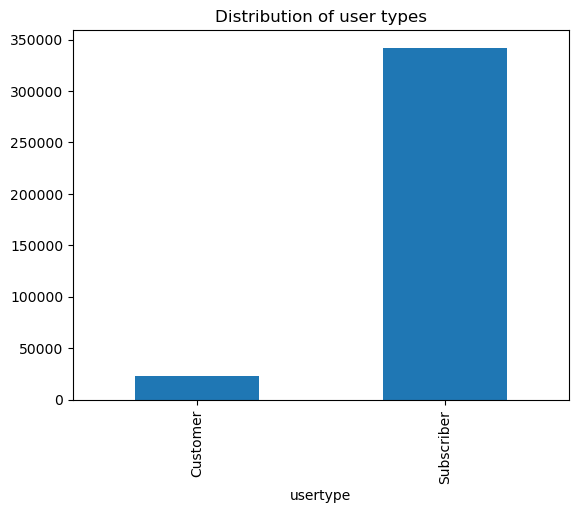

In [4]:
groupby_user = data.groupby('usertype').size()
groupby_user.plot.bar(title='Distribution of user types')

<AxesSubplot:title={'center':'Distribution of genders'}, xlabel='gender'>

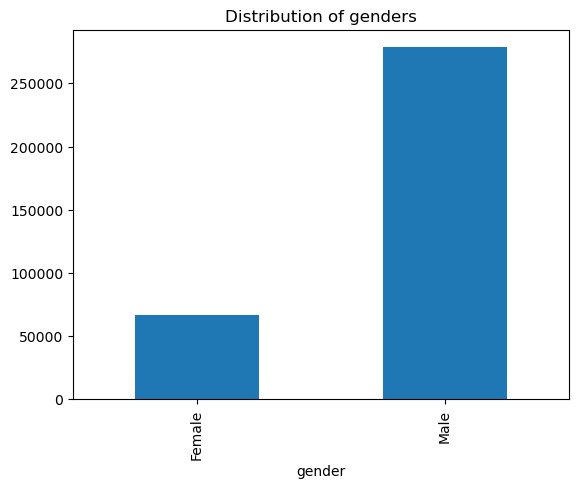

In [5]:
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title = 'Distribution of genders')

<AxesSubplot:title={'center':'Distribution of birth years'}, xlabel='birthyear'>

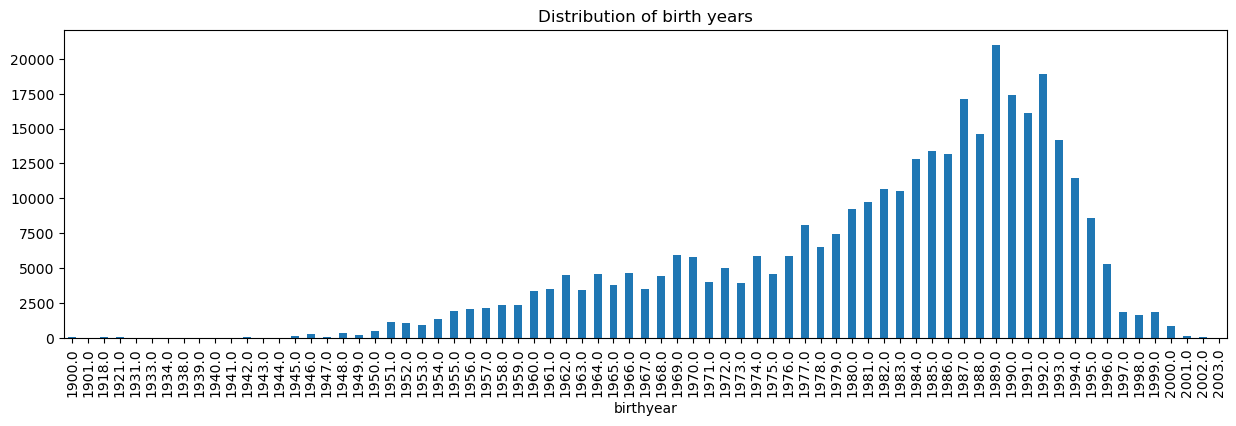

In [6]:
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title = 'Distribution of birth years',figsize = (15,4))

<AxesSubplot:title={'center':'Distribution of user types'}, xlabel='usertype'>

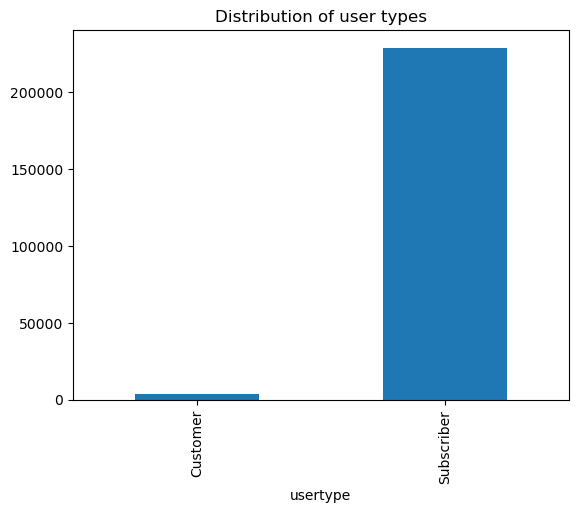

In [7]:
data_mil = data[(data['birthyear'] >= 1977) & (data['birthyear']<=1994)]
groupby_mil = data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title='Distribution of user types')

<AxesSubplot:title={'center':'Distribution of birth years by Gender'}, xlabel='birthyear'>

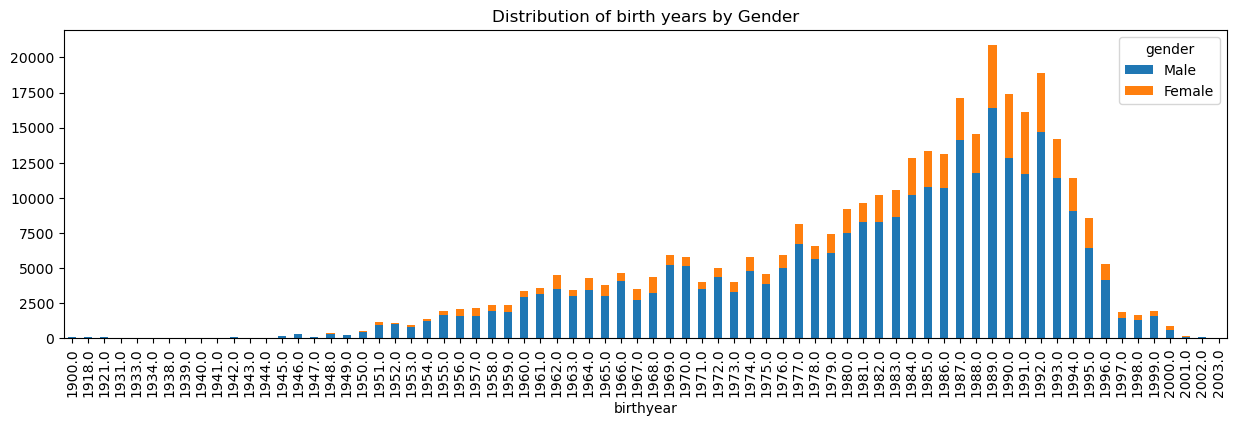

In [8]:
groupby_birthyear_gender = data.groupby(['birthyear', 'gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender[['Male','Female']].plot.bar(title =
'Distribution of birth years by Gender', stacked=True, figsize = (15,4))

<AxesSubplot:xlabel='birthyear'>

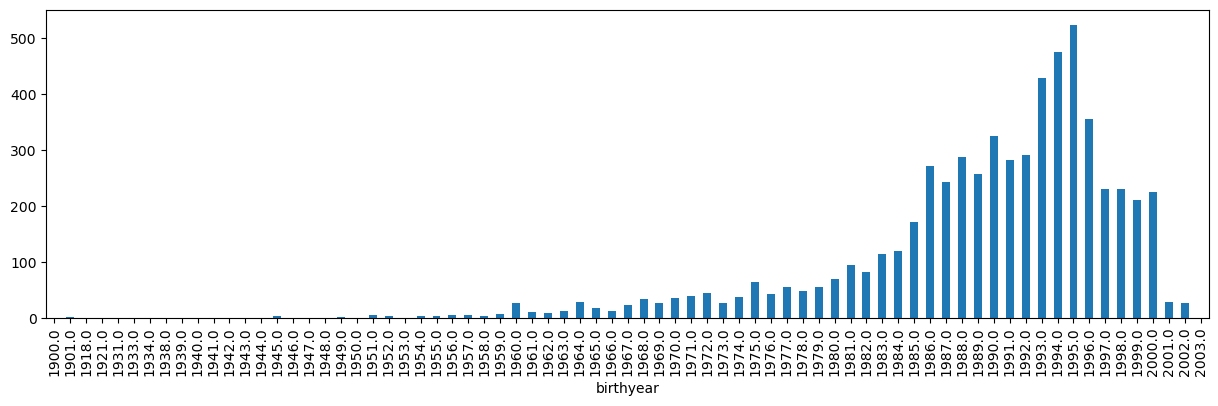

In [9]:
#Plotting the Distribution of Birth Years by User Types
groupby_birthyear_user = data.groupby(['birthyear','usertype'])['birthyear'].count().unstack('usertype').fillna(0)
groupby_birthyear_user['Customer'].plot.bar('Distribution of birth years by Usertype', stacked=True, figsize = (15,4))

In [10]:
#Validation If We Don’t Have Birth Year Available for Short-Term Pass Holders
data[data['usertype'] == 'Short-Term Pass Holder']['birthyear'].isnull().values.all()


True

In [11]:
data[data['usertype']=='Short-Term Pass Holder']['gender'].isnull().values.all()

True

In [12]:
#Converting String to datetime, and Deriving New Features
List_ = list(data['start_time'])
List_ = [datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in List_]
data['starttime_mod'] = pd.Series(List_, index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in List_],index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)
data['starttime_month'] = pd.Series([x.month for x in List_],index=data.index)
data['starttime_day'] = pd.Series([x.day for x in List_],index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_],index=data.index)

In [13]:
#data.groupby('starttime_date')['tripduration'].mean().plot.bar(title ='Distribution of Trip duration by date', figsize = (15,4))

In [14]:
trip_duration = list(data['tripduration'])
station_from = list(data['from_station_name'])
#print('Mean of trip duration: %f'%statistics.mean(trip_duration))
#print('Median of trip duration: %f'%statistics.median(trip_duration))
print('Mode of station originating from: %s'%statistics.mode(station_from))

Mode of station originating from: Clinton St & Washington Blvd


In [15]:
data['tripduration']=data['tripduration'].str.replace(',', '').astype(float)

<AxesSubplot:title={'center':'Frequency distribution of Trip durati'}, ylabel='Frequency'>

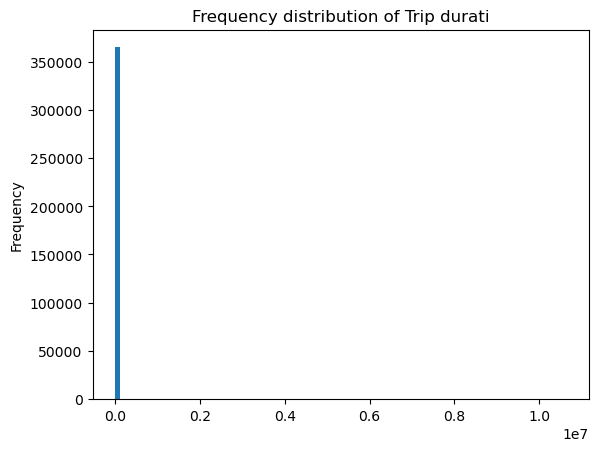

In [16]:
data['tripduration'].plot.hist(bins=100, title='Frequency distribution of Trip durati')


In [17]:
data.dtypes

trip_id                       int64
start_time                   object
end_time                     object
bikeid                        int64
tripduration                float64
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
starttime_mod        datetime64[ns]
starttime_date               object
starttime_year                int64
starttime_month               int64
starttime_day                 int64
starttime_hour                int64
dtype: object

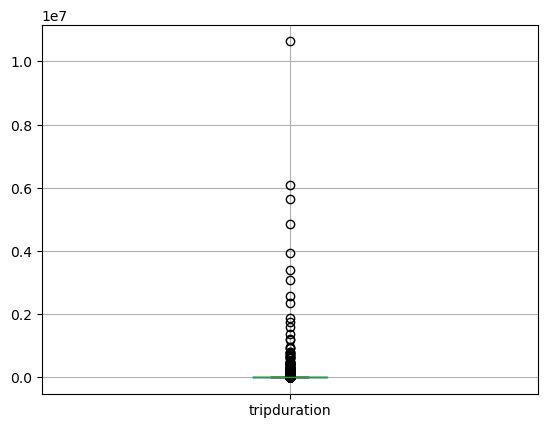

In [18]:
box = data.boxplot(column=['tripduration'])
plt.show()

In [ ]:
data = data.dropna()
seaborn.pairplot(data, vars=['age', 'tripduration'], kind='reg')
plt.show()

Script to Validate Central Limit Theorem on Trips Dataset

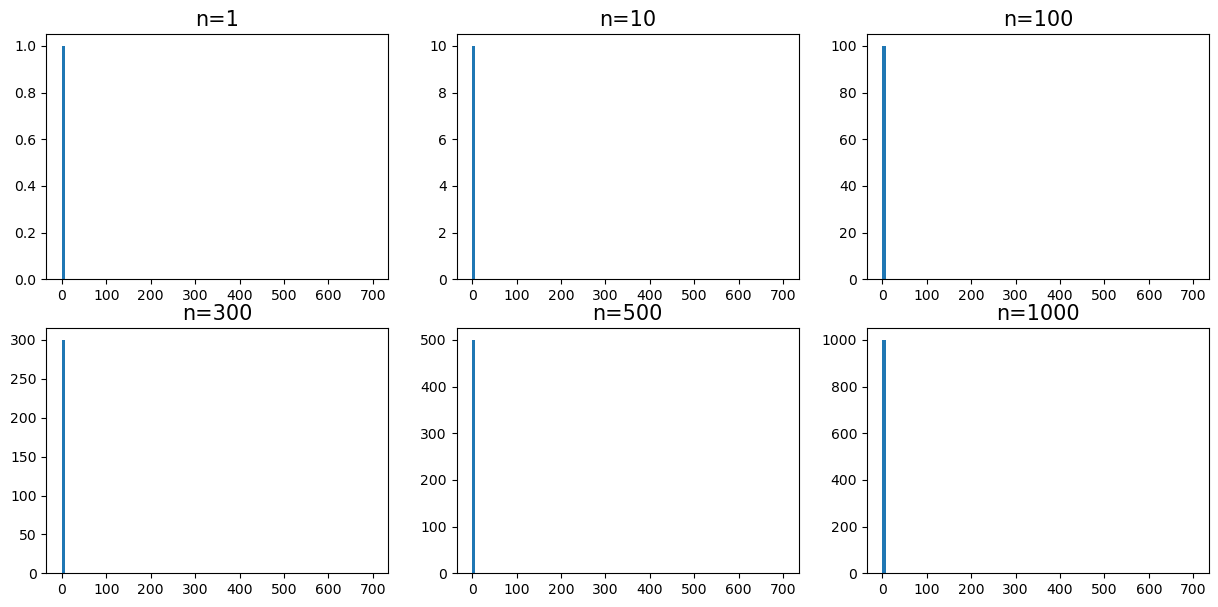

In [27]:
daily_tickets = list(data.groupby('start_time').size())
sample_tickets = []
checkpoints = [1, 10, 100, 300, 500, 1000]
plot_count = 1

random.shuffle(daily_tickets)

plt.figure(figsize=(15, 7))
binrange = np.array(np.linspace(0, 700, 101))

for i in range(1000):
    if daily_tickets:
        sample_tickets.append(daily_tickets.pop())
    if i+1 in checkpoints or not daily_tickets:
        plt.subplot(2, 3, plot_count)
        plt.hist(sample_tickets, binrange)
        plt.title('n=%d' %(i+1),fontsize=15)
        plot_count += 1
    
    if not daily_tickets:
        break

plt.show()